The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Project aims to create a ML model to predict the Average Price from the given dataset. 

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('AvacadoProject.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [6]:
df.shape

(1517, 14)

In [7]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

There are certain columns with str data type.

In [8]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

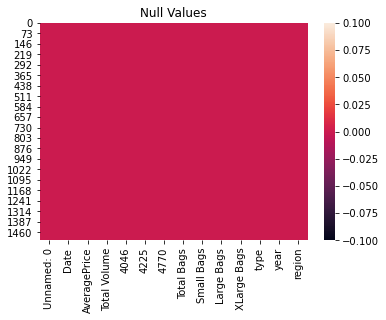

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

There are no null values in the data set.

# Data Visualisation

1517


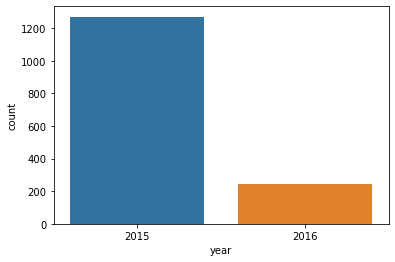

In [12]:
ax=sns.countplot(x='year',data=df)
print(df['year'].count())

Data comprises of year 2015 with more than 1200 entries and year 2016 with around 300 entries.

In [14]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [18]:
index = [ 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type']

1517


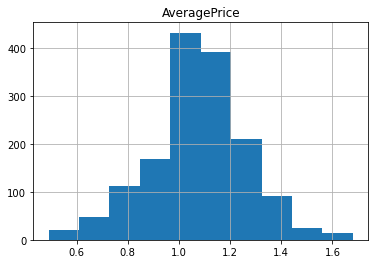

1517


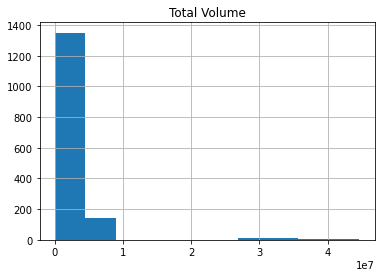

1517


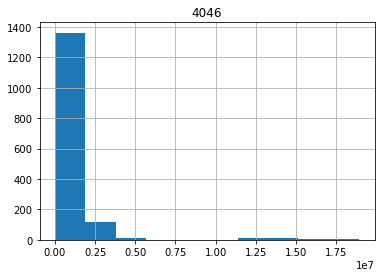

1517


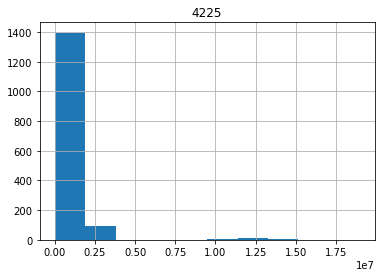

1517


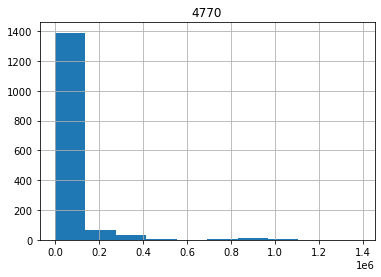

1517


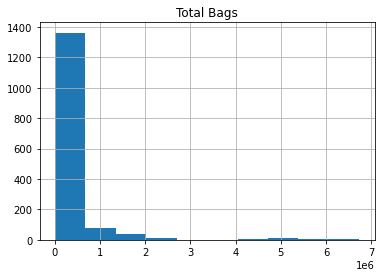

1517


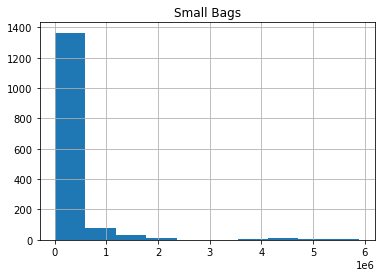

1517


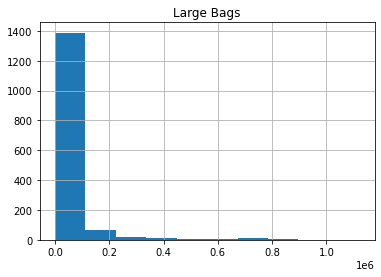

1517


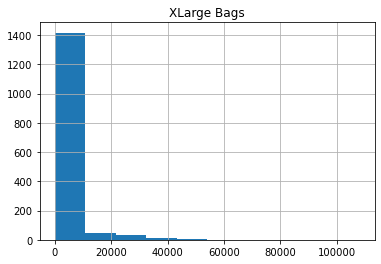

1517


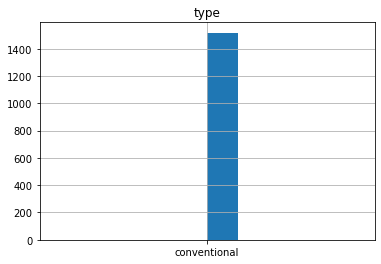

In [19]:
for i in index:
    df[i].hist(grid=True)
    plt.title(i)
    print(df[i].count())
    plt.show()

In [21]:
columns =['Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

for i in columns:
    df= df.drop([i],axis=1)

In [22]:
df= df.drop(['type'],axis=1)

In [32]:
df= df.drop(['Unnamed: 0'], axis=1)

In [33]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'year',
       'region'],
      dtype='object')

# Correlation

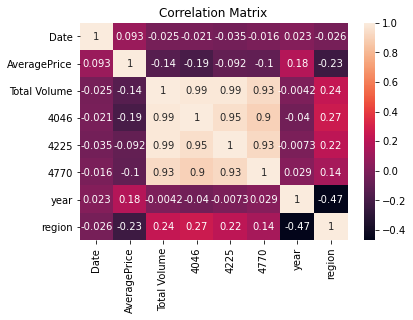

In [34]:
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

In [35]:
corr_matrix=df.corr()
corr_matrix['AveragePrice'].sort_values(ascending=False)

AveragePrice    1.000000
year            0.178683
Date            0.092984
4225           -0.092084
4770           -0.100567
Total Volume   -0.140470
4046           -0.190096
region         -0.229408
Name: AveragePrice, dtype: float64

# Encoding the data

In [140]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))

In [141]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,year,region
0,92.0,1.33,64236.62,1036.74,54454.85,48.16,2015,0.0
1,68.0,1.35,54876.98,674.28,44638.81,58.33,2015,0.0
2,44.0,0.93,118220.22,794.70,109149.67,130.50,2015,0.0
3,20.0,1.08,78992.15,1132.00,71976.41,72.58,2015,0.0
4,98.0,1.28,51039.60,941.48,43838.39,75.78,2015,0.0
...,...,...,...,...,...,...,...,...
1512,53.0,1.39,190846.01,57529.11,56366.66,17531.78,2016,7.0
1513,29.0,1.51,178235.75,43325.87,52189.61,19419.57,2016,7.0
1514,5.0,1.48,178410.82,46364.75,52893.38,16736.92,2016,7.0
1515,83.0,1.47,189131.52,54110.79,53593.58,17495.42,2016,7.0


# Skewness

In [142]:
df.skew()

Date            0.012623
AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
year            1.828332
region          0.288146
dtype: float64

Keeping +/-(0.5) as the range of skewness. 
apart from date, average price and region there's visible skewness in all columns. 

In [148]:
x=df.drop('AveragePrice', axis =1)
y=df['AveragePrice']

In [155]:
from sklearn.preprocessing import power_transform
df.new=power_transform(x)

df.new=pd.DataFrame(df.new,columns=x.columns)

In [156]:
df.new.skew()

Date           -0.286196
Total Volume    0.000000
4046           -0.012059
4225            0.008450
4770           -0.032945
year            0.000000
region         -0.209568
dtype: float64

In [157]:
x=df.new

# Checking for outliers

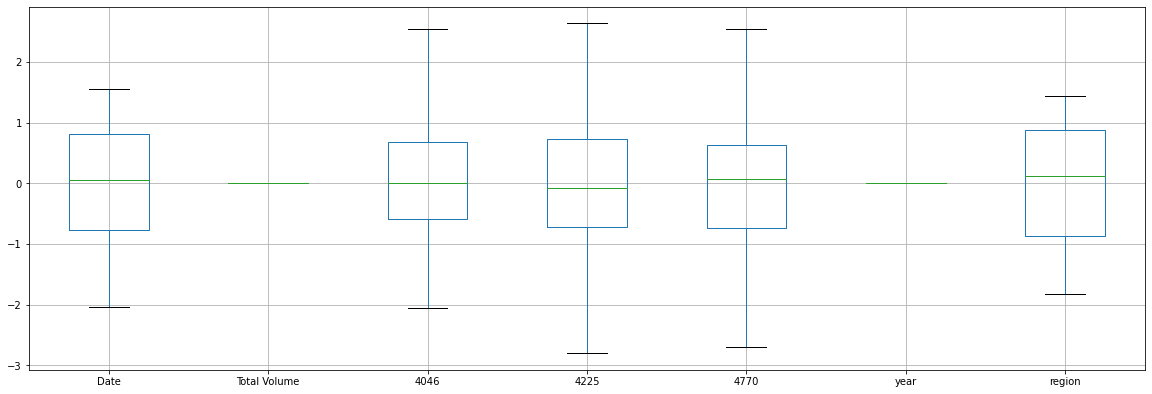

In [158]:
x.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=.25)
plt.show()

No outliers present in the Dataset.

# Finding best random state

In [159]:
from sklearn.linear_model import LinearRegression 
lr=LinearRegression() 
from sklearn.metrics import r2_score 

for i in range(0,100):
    x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=i)
    lr.fit(x_train,y_train) 
    pred_train=lr.predict(x_train) 
    pred_test=lr.predict(x_test) 
    print (f"At randon state {i}, the training accuracy is:- {r2_score(y_train, pred_train)}") 
    print (f"At random state {i}, the testing accuracy is:{r2_score(y_test,pred_test)}") 
    print("\n")

At randon state 0, the training accuracy is:- 0.3031908905135545
At random state 0, the testing accuracy is:0.23679985566614636


At randon state 1, the training accuracy is:- 0.2670970372463354
At random state 1, the testing accuracy is:0.37221991772262764


At randon state 2, the training accuracy is:- 0.27491105971404906
At random state 2, the testing accuracy is:0.34553541964825873


At randon state 3, the training accuracy is:- 0.2976211492212796
At random state 3, the testing accuracy is:0.25240021401575663


At randon state 4, the training accuracy is:- 0.3120772948841929
At random state 4, the testing accuracy is:0.1772395160654009


At randon state 5, the training accuracy is:- 0.28886365630378263
At random state 5, the testing accuracy is:0.2929460155978292


At randon state 6, the training accuracy is:- 0.2966261139239169
At random state 6, the testing accuracy is:0.24595144894806387


At randon state 7, the training accuracy is:- 0.2998868393503543
At random state 7, the te

At randon state 65, the training accuracy is:- 0.2979551475657437
At random state 65, the testing accuracy is:0.24928879304335294


At randon state 66, the training accuracy is:- 0.2975801136408822
At random state 66, the testing accuracy is:0.2587238642725329


At randon state 67, the training accuracy is:- 0.2883890485812094
At random state 67, the testing accuracy is:0.29074322448615164


At randon state 68, the training accuracy is:- 0.29128968381397835
At random state 68, the testing accuracy is:0.2687175234842415


At randon state 69, the training accuracy is:- 0.3081128066164792
At random state 69, the testing accuracy is:0.1984200688197847


At randon state 70, the training accuracy is:- 0.291179412707687
At random state 70, the testing accuracy is:0.2810858496778418


At randon state 71, the training accuracy is:- 0.2950915587306586
At random state 71, the testing accuracy is:0.2624093318583671


At randon state 72, the training accuracy is:- 0.2842828772516036
At random state

In [176]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=99)

In [177]:
lr.fit(x_train, y_train)

LinearRegression()

In [178]:
prd_test=lr.predict(x_test)

In [179]:
print (r2_score(y_test, pred_test))

0.346234802485348


# Cross-validation of the model

In [180]:
Train_accuracy=r2_score(y_train,pred_train) 
Test_accuracy= r2_score(y_test,pred_test)

In [181]:
from sklearn.model_selection import cross_val_score 
for j in range (2,10):
    cv_score=cross_val_score (lr , x, y, cv=j)
    cv_mean=cv_score.mean()
    print(f" At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}")  
    print("\n")

 At cross fold 2 the cv score is 0.09543971890972014 and accuracy score for training is 0.27665091513179807 and accuracy score for testing is 0.346234802485348


 At cross fold 3 the cv score is 0.223756108397425 and accuracy score for training is 0.27665091513179807 and accuracy score for testing is 0.346234802485348


 At cross fold 4 the cv score is 0.15660148049710262 and accuracy score for training is 0.27665091513179807 and accuracy score for testing is 0.346234802485348


 At cross fold 5 the cv score is 0.1414216717105808 and accuracy score for training is 0.27665091513179807 and accuracy score for testing is 0.346234802485348


 At cross fold 6 the cv score is 0.023477431566438407 and accuracy score for training is 0.27665091513179807 and accuracy score for testing is 0.346234802485348


 At cross fold 7 the cv score is 0.15071097327737984 and accuracy score for training is 0.27665091513179807 and accuracy score for testing is 0.346234802485348


 At cross fold 8 the cv score 

Since the number of folds don't have such impact on the accuracy and cv_score. So cv=2 is selected.

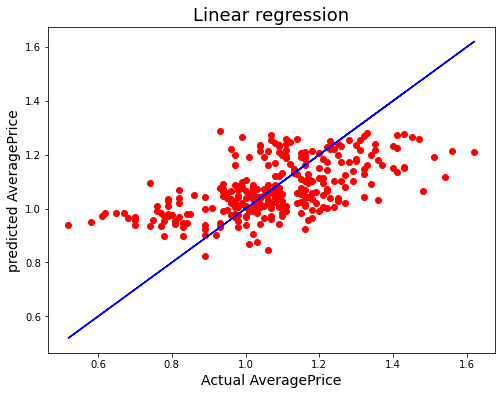

In [183]:
import matplotlib.pyplot as plt 
plt. figure(figsize=(8,6)) 
plt. scatter(x=y_test, y=pred_test, color='r') 
plt.plot(y_test, y_test, color='b') 
plt.xlabel('Actual AveragePrice', fontsize=14) 
plt.ylabel('predicted AveragePrice', fontsize=14) 
plt.title('Linear regression', fontsize=18) 
plt.show()

# Regularization

In [184]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score

In [185]:
from sklearn.linear_model import Lasso 
parameters = {'alpha' : [.0001, .001, .01, .1, 1, 10], 'random_state' :list (range(0,10))} 
ls= Lasso() 
clf= GridSearchCV(ls, parameters) 
clf.fit(x_train, y_train)
print (clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [186]:
ls=Lasso(alpha=1, random_state=0) 
ls.fit(x_train, y_train) 
ls.score(x_train, y_train) 
pred_ls=ls.predict(x_test) 
lss = r2_score(y_test ,pred_ls) 
lss

-0.00040035873508559305

In [190]:
cv_score=cross_val_score (ls , x, y,cv=2) 
cv_mean=cv_score.mean() 
cv_mean

-0.08982817361949014

# Ensemble Technique

In [191]:
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestRegressor 


parameters = {'criterion':['mse', 'mae'], 'max_features':['auto', 'sqrt','log2']}
rf=RandomForestRegressor() 
clf = GridSearchCV(rf,parameters) 
clf.fit(x_train,y_train) 
print (clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [193]:
rf=RandomForestRegressor (criterion="mse", max_features="auto") 
rf.fit(x_train, y_train) 
rf.score(x_train,y_train) 
pred_decision =rf.predict(x_test) 

rfs = r2_score(y_test, pred_decision) 
print('R2 core:' , rfs*100 ) 
     
rfscore = cross_val_score( rf,x,y,cv=2) 
rfc = rfscore.mean() 
print('Cross Val Score:',rfc* 100)

R2 core: 77.53434734231145
Cross Val Score: -63.132344940234475


In [195]:
import pickle 
filename = 'AvacadoProject.pkl'
pickle.dump(rf, open( filename, 'wb' ))

# Conclusion

In [197]:
loaded_model = pickle.load(open('AvacadoProject.pkl', 'rb')) 
result = loaded_model.score(x_test, y_test)

print(result)

0.7753434734231145


In [198]:
conclusion=pd. DataFrame([loaded_model.predict(x_test)[:], pred_decision[:]], index=["Predicted", "orginal"])

conclusion

,0,1,2,3,4,5,6,7,8,9,...,294,295,296,297,298,299,300,301,302,303
Predicted,1.3467,1.116,0.7235,1.0509,1.1016,1.0629,1.096,0.7985,0.7585,1.0673,...,0.9598,0.7251,1.1595,1.0017,1.0356,1.0042,1.0197,1.0207,1.2884,1.0217
orginal,1.3467,1.116,0.7235,1.0509,1.1016,1.0629,1.096,0.7985,0.7585,1.0673,...,0.9598,0.7251,1.1595,1.0017,1.0356,1.0042,1.0197,1.0207,1.2884,1.0217
